# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

## Current Model Note for cw3 

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization, LSTM, TimeDistributed
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K


import seaborn as sns


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
# DEPRECATED: New clean file was generated, which we will be used from now on
base_df_old = pd.DataFrame()

clean_data_folder = "../pdiot-data/2021"

for sUNN_folder in os.listdir(clean_data_folder):
    path_directory = clean_data_folder+"/"+sUNN_folder
    if os.path.isdir(path_directory):
        print(sUNN_folder)
        for filename in os.listdir(path_directory):
            try:
                    full_path = f"{clean_data_folder}/{sUNN_folder}/{filename}"
                    print(full_path)

                    # load data into a DataFrame
                    new_df = pd.read_csv(full_path)
#                     print(new_df)

                    # merge into the base DataFrame
                    base_df_old = pd.concat([base_df_old, new_df])
            except Exception as e:
                print(e)
    else:
        print(sUNN_folder + " is not a directory")


README.md is not a directory
Respeck_recordings_clean.csv is not a directory
Thingy_recordings_clean.csv is not a directory
s1541031
../pdiot-data/2021/s1541031/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on knees_06-10-2021_15-48-40.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the back_06-10-2021_15-55-24.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the left_06-10-2021_16-04-18.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down on stomach_06-10-

../pdiot-data/2021/s1711661/Respeck_s1711661_Lying down on stomach_23-09-2021_20-15-13.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Lying down right_23-09-2021_20-12-34.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Movement_23-09-2021_21-12-32.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Running_23-09-2021_20-44-06.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Sitting bent backward_23-09-2021_19-56-37.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Sitting bent forward_23-09-2021_19-54-06.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Sitting_23-09-2021_19-51-48.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Standing_23-09-2021_19-58-56.csv
../pdiot-data/2021/s1711661/Respeck_s1711661_Walking at normal speed_23-09-2021_20-23-44.csv
../pdiot-data/2021/s1711661/Thingy_s1711661_Climbing stairs_23-09-2021_21-01-08.csv
../pdiot-data/2021/s1711661/Thingy_s1711661_Descending stairs_23-09-2021_21-00-17.csv
../pdiot-data/2021/s1711661/Thingy_s1711661_Desk work_23-09-2021_21-1

../pdiot-data/2021/s1724067/Respeck_s1724067_Running_06-10-2021_19-55-17.csv
../pdiot-data/2021/s1724067/Respeck_s1724067_Sitting bent backward_03-10-2021_16-28-44.csv
../pdiot-data/2021/s1724067/Respeck_s1724067_Sitting bent forward_03-10-2021_16-27-22.csv
../pdiot-data/2021/s1724067/Respeck_s1724067_Sitting_03-10-2021_16-25-59.csv
../pdiot-data/2021/s1724067/Respeck_s1724067_Standing_03-10-2021_16-29-48.csv
../pdiot-data/2021/s1724067/Respeck_s1724067_Walking at normal speed_06-10-2021_19-54-01.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Climbing stairs_06-10-2021_19-46-31.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Descending stairs_06-10-2021_19-49-45.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Desk work_06-10-2021_20-24-14.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Falling on knees_06-10-2021_20-25-16.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Falling on the back_06-10-2021_20-40-47.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Falling on the left_06-10-202

../pdiot-data/2021/s1732873/Respeck_s1732873_Lying down left_04-10-2021_13-00-51.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Lying down on back_04-10-2021_12-57-16.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Lying down on stomach_04-10-2021_13-01-40.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Lying down right_04-10-2021_13-00-02.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Movement_04-10-2021_16-10-37.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Running_04-10-2021_15-32-54.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting bent backward_04-10-2021_12-55-01.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting bent forward_04-10-2021_12-54-13.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting_04-10-2021_12-53-07.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Standing_04-10-2021_12-55-45.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Walking at normal speed_04-10-2021_15-30-06.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Climbing stairs_04-10-

../pdiot-data/2021/s1761322/Thingy_s1761322_Standing_27-09-2021_10-42-16.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Walking at normal speed_27-09-2021_13-02-07.csv
s1800883
../pdiot-data/2021/s1800883/Respeck_s1800883_Climbing stairs_29-09-2021_14-36-21.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Descending stairs_29-09-2021_14-35-23.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Desk work_29-09-2021_14-50-28.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on knees_29-09-2021_14-48-24.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the back_29-09-2021_14-23-09.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the left_29-09-2021_14-33-04.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the right_29-09-2021_14-28-22.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down left_29-09-2021_13-40-06.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down on back_29-09-2021_13-38-01.csv
../pdiot-data/2021/s1800883/Respeck_s1800883

../pdiot-data/2021/s1817455/Thingy_s1817455_Running_29-09-2021_14-58-21.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting bent backward_29-09-2021_14-25-28.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting bent forward_29-09-2021_14-23-21.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting_29-09-2021_14-21-18.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Standing_29-09-2021_14-27-26.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
s1817972
../pdiot-data/2021/s1817972/Respeck_s1817972_Climbing stairs_05-10-2021_14-15-10.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Descending stairs_05-10-2021_14-14-27.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Desk work_05-10-2021_11-25-28.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on knees_05-10-2021_11-27-06.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on the back_05-10-2021_11-49-17.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on the left_

../pdiot-data/2021/s1823274/Thingy_s1823274_Falling on the right_04-10-2021_15-25-00.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down left_04-10-2021_13-45-54.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down on back_04-10-2021_13-45-13.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down on stomach_04-10-2021_13-47-19.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down right_04-10-2021_13-46-38.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Movement_04-10-2021_13-43-54.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Running_04-10-2021_14-15-16.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting bent backward_04-10-2021_13-41-11.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting bent forward_04-10-2021_13-40-27.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting_04-10-2021_13-39-49.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Standing_04-10-2021_13-41-51.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Walking at normal speed_04-10-2021_1

../pdiot-data/2021/s1841064/Thingy_s1841064_Descending stairs_04-10-2021_14-24-09.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Desk work_04-10-2021_14-05-23.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on knees_04-10-2021_14-53-10.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the back_04-10-2021_14-58-33.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the left_04-10-2021_15-09-46.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the right_04-10-2021_15-11-39.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down left_06-10-2021_13-07-16.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down on back_04-10-2021_13-58-28.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down on stomach_04-10-2021_14-01-16.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down right_04-10-2021_14-00-22.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Movement_04-10-2021_14-02-16.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Running_04-10-2021_

../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down on back_07-10-2021_16-41-06.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down on stomach_07-10-2021_16-43-31.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down right_07-10-2021_16-41-56.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Movement_30-09-2021_12-22-05.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Running_30-09-2021_12-18-48.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting bent backward_30-09-2021_12-13-10.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting bent forward_30-09-2021_12-12-06.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting_30-09-2021_12-11-22.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Standing_30-09-2021_12-14-03.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Walking at normal speed_30-09-2021_12-18-08.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Climbing stairs_29-09-2021_13-25-23.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Descending stairs_29-09

../pdiot-data/2021/s1865457/Thingy_s1865457_Walking at normal speed_30-09-2021_12-54-57.csv
s1865890
../pdiot-data/2021/s1865890/Respeck_s1865890_Climbing stairs_06-10-2021_10-01-56.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Descending stairs_06-10-2021_10-03-51.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Desk work_05-10-2021_18-26-33.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on knees_05-10-2021_18-38-24.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on the back_05-10-2021_18-34-13.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on the left_05-10-2021_18-51-26.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on the right_05-10-2021_18-42-25.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Lying down left_05-10-2021_18-18-11.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Lying down on back_05-10-2021_18-17-22.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06.csv
../pdiot-data/2021/s1865890/Re

../pdiot-data/2021/s1870697/Thingy_s1870697_Lying down right_04-10-2021_18-34-22.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Movement_04-10-2021_18-24-48.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Running_03-10-2021_17-44-20.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Sitting bent backward_05-10-2021_10-30-07.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Sitting bent forward_03-10-2021_13-50-01.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Sitting_05-10-2021_02-35-37.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Standing_05-10-2021_02-32-49.csv
../pdiot-data/2021/s1870697/Thingy_s1870697_Walking at normal speed_03-10-2021_17-36-05.csv
s1891214
../pdiot-data/2021/s1891214/Respeck_s1891214_Climbing stairs_07-10-2021_14-25-08.csv
../pdiot-data/2021/s1891214/Respeck_s1891214_Descending stairs_07-10-2021_14-24-31.csv
../pdiot-data/2021/s1891214/Respeck_s1891214_Desk work_07-10-2021_14-28-36.csv
../pdiot-data/2021/s1891214/Respeck_s1891214_Falling on knees_07-10-2021_14-37

../pdiot-data/2021/s1894401/Thingy_s1894401_Falling on the back_01-10-2021_11-12-51.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Falling on the left_01-10-2021_11-07-27.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Falling on the right_01-10-2021_11-01-28.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Lying down left_01-10-2021_11-29-38.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Lying down on back_06-10-2021_10-29-12.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Lying down on stomach_01-10-2021_11-27-46.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Lying down right_06-10-2021_10-30-33.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Movement_01-10-2021_11-22-15.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Running_01-10-2021_12-24-01.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Sitting bent backward_01-10-2021_11-31-20.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Sitting bent forward_01-10-2021_11-32-05.csv
../pdiot-data/2021/s1894401/Thingy_s1894401_Sitting_01-10

../pdiot-data/2021/s2125423/Respeck_s2125423_Lying down right_03-10-2021_15-57-27.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Movement_03-10-2021_16-04-42.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Running_03-10-2021_17-35-53.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Sitting bent backward_03-10-2021_15-52-10.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Sitting bent forward_03-10-2021_15-50-43.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Sitting_03-10-2021_15-49-17.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Standing_03-10-2021_15-53-38.csv
../pdiot-data/2021/s2125423/Respeck_s2125423_Walking at normal speed_03-10-2021_17-34-03.csv
../pdiot-data/2021/s2125423/Thingy_s2125423_Climbing stairs_03-10-2021_17-24-27.csv
../pdiot-data/2021/s2125423/Thingy_s2125423_Descending stairs_03-10-2021_17-23-15.csv
../pdiot-data/2021/s2125423/Thingy_s2125423_Desk work_03-10-2021_16-07-18.csv
../pdiot-data/2021/s2125423/Thingy_s2125423_Falling on knees_03-10-2021_16-12-11.c

../pdiot-data/2021/s2171931/Thingy_s2171931_Walking at normal speed_04-10-2021_14-35-01.csv
s2173036
../pdiot-data/2021/s2173036/Respeck_s2173036_Climbing stairs_03-10-2021_23-05-39.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Descending stairs_03-10-2021_23-01-56.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Desk work_03-10-2021_22-46-58.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on knees_06-10-2021_13-39-32.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the back_06-10-2021_14-14-11.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the left_06-10-2021_14-07-09.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the right_06-10-2021_14-10-39.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Lying down left_03-10-2021_22-42-13.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Lying down on back_03-10-2021_22-45-15.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Lying down on stomach_03-10-2021_22-44-21.csv
../pdiot-data/2021/s2173036/Re

../pdiot-data/2021/s2192970/Thingy_s2192970_Falling on the right_06-10-2021_21-06-11.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Lying down left_29-09-2021_17-56-33.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Lying down on back_29-09-2021_17-55-11.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Lying down on stomach_29-09-2021_18-01-37.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Lying down right_29-09-2021_17-58-16.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Movement_29-09-2021_17-42-21.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Running_29-09-2021_17-38-31.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Sitting bent backward_07-10-2021_21-47-56.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Sitting bent forward_07-10-2021_21-47-10.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Sitting_07-10-2021_21-46-25.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Standing_06-10-2021_22-42-04.csv
../pdiot-data/2021/s2192970/Thingy_s2192970_Walking at normal speed_29-09-2021_1

../pdiot-data/2021/s2212045/Respeck_s2212045_Standing_29-09-2021_11-37-47.csv
../pdiot-data/2021/s2212045/Respeck_s2212045_Walking at normal speed_29-09-2021_13-00-10.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Falling on knees_21-10-2021_15-51-25.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Falling on the back_21-10-2021_15-57-44.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Falling on the left_21-10-2021_15-52-32.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Falling on the right_21-10-2021_15-53-56.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Lying down left_29-09-2021_11-57-39.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Lying down on back_29-09-2021_11-56-56.csv
../pdiot-data/2021/s2212045/Thingy_s2212045_Lying down on st

In [32]:
base_df_old = base_df_old[base_df_old['sensor_type'] == 'Respeck'] 
base_df = base_df_old.copy()

In [286]:
#Load Clean Respeck Recording to base_df
clean_data_folder = "../pdiot-data/2021/Respeck_recordings_clean.csv"
base_df = pd.read_csv(clean_data_folder)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
columns_of_interest_initial = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z','subject_id','activity_code', 'activity_type','recording_id']
# columns_of_

In [34]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)



In [35]:
for rid, group in base_df.groupby("subject_id"):
    print(f"The number of activities done by {rid} are: {len(group.activity_type.unique())}")
    print(group.activity_type.unique())


The number of activities done by s1541031 are: 18
['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on back' 'Lying down on stomach'
 'Lying down right' 'Movement' 'Running' 'Sitting bent backward'
 'Sitting bent forward' 'Sitting' 'Standing' 'Walking at normal speed']
The number of activities done by s1704145 are: 18
['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on back' 'Lying down on stomach'
 'Lying down right' 'Movement' 'Running' 'Sitting bent backward'
 'Sitting bent forward' 'Sitting' 'Standing' 'Walking at normal speed']
The number of activities done by s1706154 are: 18
['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on 

## Utilities

In [ ]:
def get_activity_code():
    

In [37]:
base_df.activity_type.unique()

array(['Climbing stairs', 'Descending stairs', 'Desk work',
       'Falling on knees', 'Falling on the back', 'Falling on the left',
       'Falling on the right', 'Lying down left', 'Lying down on back',
       'Lying down on stomach', 'Lying down right', 'Movement', 'Running',
       'Sitting bent backward', 'Sitting bent forward', 'Sitting',
       'Standing', 'Walking at normal speed'], dtype=object)

In [38]:
def remove_activity_label(df, activity_to_remove):
    df = df[df.activity_type!=activity_to_remove]
    return df

In [39]:

base_df = remove_activity_label(base_df,'Movement')
base_df =  remove_activity_label(base_df,'Desk work')
base_df =  remove_activity_label(base_df,'Climbing stairs')
base_df =  remove_activity_label(base_df,'Descending stairs')


## Preprocessing - trials

In [189]:
from scipy import signal

def filter(dataframe, cutoff=0.1):
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter

    x_low = signal.filtfilt(b, a, dataframe.accel_x)
    y_low = signal.filtfilt(b, a, dataframe.accel_y)
    z_low = signal.filtfilt(b, a, dataframe.accel_z)

    dataframe.loc[:, 'accel_x'] = x_low
    dataframe.loc[:, 'accel_y'] = y_low
    dataframe.loc[:, 'accel_z'] = z_low
    return dataframe

In [190]:
base_df = filter(base_df)

In [190]:
#Experimenting: Normalising data - FAIL
#Provides lower accuracy 
normalised = []
for rid, group in base_df.groupby("activity_type"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training]=(group[columns_of_interest_training]-group[columns_of_interest_training].mean())/group[columns_of_interest_training].std()

    normalised.append(group)
new_df = pd.concat(normalised)

Processing rid = Climbing stairs
Processing rid = Descending stairs
Processing rid = Desk work
Processing rid = Falling on knees
Processing rid = Falling on the back
Processing rid = Falling on the left
Processing rid = Falling on the right
Processing rid = Lying down left
Processing rid = Lying down on back
Processing rid = Lying down on stomach
Processing rid = Lying down right
Processing rid = Movement
Processing rid = Running
Processing rid = Sitting
Processing rid = Sitting bent backward
Processing rid = Sitting bent forward
Processing rid = Standing
Processing rid = Walking at normal speed


In [119]:
#Experimenting: Normalising data v2 (Normalise ALL data) -

base_df[columns_of_interest_training]=(base_df[columns_of_interest_training]-base_df[columns_of_interest_training].mean())/base_df[columns_of_interest_training].std()


In [207]:
#Passing difference of values for training - FAIL
differences = []
for rid, group in base_df.groupby("recording_id"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training] = group[columns_of_interest_training].diff()
    differences.append(group)
new_df = pd.concat(differences)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-2021_18-30-14
Processing rid = Respeck_

Processing rid = Respeck_s1801931_Sitting bent backward_05-10-2021_22-58-02
Processing rid = Respeck_s1801931_Sitting bent forward_05-10-2021_22-56-09
Processing rid = Respeck_s1801931_Sitting_05-10-2021_22-46-37
Processing rid = Respeck_s1801931_Standing_05-10-2021_22-38-33
Processing rid = Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32
Processing rid = Respeck_s1813106_Descending stairs_07-10-2021_11-35-40
Processing rid = Respeck_s1813106_Desk work_07-10-2021_01-12-36
Processing rid = Respeck_s1813106_Lying down left_06-10-2021_20-22-50
Processing rid = Respeck_s1813106_Lying down on back_06-10-2021_20-26-49
Processing rid = Respeck_s1813106_Lying down on stomach_06-10-2021_20-25-39
Processing rid = Respeck_s1813106_Lying down right_06-10-2021_20-23-35
Processing rid = Respeck_s1813106_Movement_07-10-2021_01-18-49
Processing rid = Respeck_s1813106_Running_07-10-2021_00-34-58
Processing rid = Respeck_s1813106_Sitting bent backward_06-10-2021_20-16-19
Processing rid = Re

Processing rid = Respeck_s1865890_Desk work_05-10-2021_18-26-33
Processing rid = Respeck_s1865890_Lying down left_05-10-2021_18-18-11
Processing rid = Respeck_s1865890_Lying down on back_05-10-2021_18-17-22
Processing rid = Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06
Processing rid = Respeck_s1865890_Lying down right_05-10-2021_18-19-15
Processing rid = Respeck_s1865890_Movement_06-10-2021_09-57-59
Processing rid = Respeck_s1865890_Running_06-10-2021_10-07-41
Processing rid = Respeck_s1865890_Sitting bent backward_05-10-2021_18-14-54
Processing rid = Respeck_s1865890_Sitting bent forward_05-10-2021_18-10-45
Processing rid = Respeck_s1865890_Sitting_06-10-2021_10-31-42
Processing rid = Respeck_s1865890_Standing_05-10-2021_18-16-13
Processing rid = Respeck_s1865890_Walking at normal speed_06-10-2021_10-06-40
Processing rid = Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24
Processing rid = Respeck_s1870467_Descending stairs_06-10-2021_11-27-15
Processing rid = Respeck_

Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-30
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-36
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-45
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-56
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-19
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-24
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-33
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-39
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-57
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-35
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-04-01
Processing rid = Respeck_

Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-39
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-40
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-41
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-42
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-43
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-44
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-45
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-46
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-47
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-48
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-49
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-50
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-51
Processing rid = Respeck_

In [296]:
#Preprocessing outliers, meh. So far no improvements
#Update: works decent with normalising all columns. No improvement, but better to keep it for stability of data.
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())

In [200]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1.633516e+12,0.605850,-0.458647,-0.906371,-0.447552,5.827068,17.871429,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.229341,0.110179,-0.865967,-2.440559,1.323308,-8.442857,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,1.633516e+12,0.777159,-0.177848,-0.640249,2.454545,11.766917,-9.614286,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,1.633516e+12,0.676416,-0.620879,-0.582751,-1.699301,1.195489,5.428571,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,1.633516e+12,0.215413,-0.056969,-0.441336,-6.496503,2.511278,7.485714,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492670,1.633546e+12,-0.376509,-0.099479,0.386558,2.034965,0.714286,8.514286,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492671,1.633546e+12,-0.336583,-0.121457,0.417638,1.076923,-1.353383,10.485714,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492672,1.633546e+12,-0.483287,-0.170619,0.434343,1.867133,-1.789474,6.842857,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492673,1.633546e+12,-0.436397,-0.162233,0.456488,2.090909,-0.157895,3.228571,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...


In [94]:
base_df= new_df
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

NameError: name 'new_df' is not defined

In [210]:
#Minmaxscaler Attempt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())


In [5]:
len(base_df.activity_type.values == 'Falling on Knees')



NameError: name 'columns_of_interest_training' is not defined

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [6]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Standing' 'Movement' 'Lying down on stomach'
 'Sitting bent backward' 'Lying down left' 'Lying down on back'
 'Descending stairs' 'Sitting bent forward' 'Walking at normal speed'
 'Running' 'Lying down right' 'Desk work' 'Sitting' 'Falling on knees'
 'Falling on the back' 'Falling on the right' 'Falling on the left']
The number of unique recordings is: 876
The subject IDs in the recordings are: 46


## Split by subject id

In [6]:
from sklearn.model_selection import GroupShuffleSplit

X_with_subject_id = base_df[columns_of_interest_initial]
y_with_subject_id = base_df['activity_code']



# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=2)

train_ix, test_ix = next(gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id))


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]




# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)




In [8]:
#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [65]:
def overlap_class_labels_for_training_and_testing(training_set, testing_set):
    training_set = []
#     subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]
    class_labels = []
    return training_set, class_labels


def group_into_sliding_windows(df,window_size=50,step_size=25, step_size_falling=5):

    window_number = 0 # start a counter at 0 to keep track of the window number

    all_overlapping_windows = []


    for rid, group in df.groupby("recording_id"):
#         print(f"Processing rid = {rid}")
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

        overlapping_windows =[]
        #TODO: Change the label into activity codes, since we are changing the activity types
        if group['activity_type'].unique()[0] == grouped_falling_label:
            overlapping_windows = large_enough_windows[::step_size_falling] 

        else:
            overlapping_windows = large_enough_windows[::step_size] 
#         print(len(overlapping_windows))
        # then we will append a window ID to each window
        if overlapping_windows:
            for window in overlapping_windows:
                window.loc[:, 'window_id'] = window_number
                window_number += 1


            all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
        
    final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)
    
    #Test to see if there are any elements that have NaN
    is_NaN = final_sliding_windows.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = final_sliding_windows[row_has_NaN]

    print(rows_with_NaN)
    return final_sliding_windows.reset_index(drop=True)

In [385]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
29
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
30
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
30
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
29
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
29
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
30
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
30
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
30
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
30
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
29
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
29
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
29
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
29
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-

30
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
30
Processing rid = Respeck_s1757177_Lying down right_06-10-2021_20-38-38
30
Processing rid = Respeck_s1757177_Movement_06-10-2021_16-44-16
30
Processing rid = Respeck_s1757177_Running_02-10-2021_14-09-21
30
Processing rid = Respeck_s1757177_Sitting bent backward_06-10-2021_16-40-06
30
Processing rid = Respeck_s1757177_Sitting bent forward_06-10-2021_16-41-05
30
Processing rid = Respeck_s1757177_Sitting_02-10-2021_13-38-45
30
Processing rid = Respeck_s1757177_Standing_02-10-2021_13-46-10
30
Processing rid = Respeck_s1757177_Walking at normal speed_02-10-2021_14-01-07
30
Processing rid = Respeck_s1761322_Climbing stairs_06-10-2021_11-51-15
29
Processing rid = Respeck_s1761322_Descending stairs_06-10-2021_11-52-16
29
Processing rid = Respeck_s1761322_Desk work_06-10-2021_12-22-13
29
Processing rid = Respeck_s1761322_Lying down left_27-09-2021_11-00-29
29
Processing rid = Respeck_s1761322_Lying down on back_27-

29
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
29
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
29
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
29
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
29
Processing rid = Respeck_s1824891_Desk work_06-10-2021_16-55-14
29
Processing rid = Respeck_s1824891_Lying down left_06-10-2021_16-48-30
29
Processing rid = Respeck_s1824891_Lying down on back_06-10-2021_16-45-46
29
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
29
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
29
Processing rid = Respeck_s1824891_Movement_06-10-2021_16-53-11
29
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
29
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
29
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
29
Processing rid = Respeck_s1824891_Sitting_07-

ValueError: No objects to concatenate

In [383]:
X_train_sliding_windows['recording_id']

0         Respeck_s1541031_Climbing stairs_06-10-2021_11...
1         Respeck_s1541031_Climbing stairs_06-10-2021_11...
2         Respeck_s1541031_Climbing stairs_06-10-2021_11...
3         Respeck_s1541031_Climbing stairs_06-10-2021_11...
4         Respeck_s1541031_Climbing stairs_06-10-2021_11...
                                ...                        
932870    xlstry-Respeck_s2254050_Lying down on back_06-...
932871    xlstry-Respeck_s2254050_Lying down on back_06-...
932872    xlstry-Respeck_s2254050_Lying down on back_06-...
932873    xlstry-Respeck_s2254050_Lying down on back_06-...
932874    xlstry-Respeck_s2254050_Lying down on back_06-...
Name: recording_id, Length: 932875, dtype: object

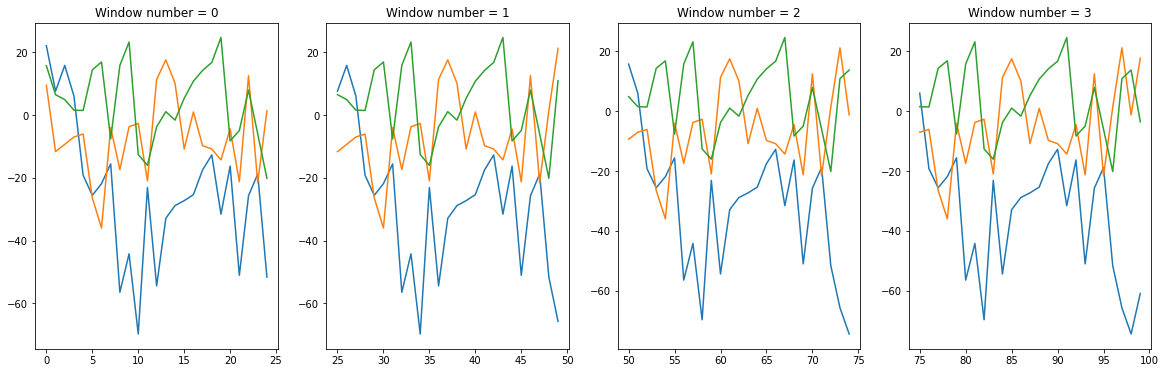

In [316]:
first_four_windows = [group for _, group in X_train_sliding_windows[X_train_sliding_windows.window_id < 4].groupby("window_id")]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

### Grouping Falling together, Lying together, Sitting/Standing together


In [41]:
grouped_falling_label = 'Falling (Grouped)'
grouped_lying_label = 'Lying (Grouped)'
grouped_sitting_or_standing_label = 'Sitting/Standing'


def grouping_activities_together(base_df, individual_activities_to_group, new_label):
    grouped_dataframes = []
    for act, group in base_df.groupby("activity_type"):
        if act in individual_activities_to_group:
            group['activity_type'] = new_label

        grouped_dataframes.append(group)
    base_df = pd.concat(grouped_dataframes)
    return base_df

#TODO: Could be done faster in one line or two
def group_falling_together(base_df):
    falling_activities= ['Falling on knees', 'Falling on the back', 'Falling on the left', 'Falling on the right']
    base_df = grouping_activities_together(base_df, falling_activities, grouped_falling_label)
    return base_df
  

def group_lying_together(base_df):
    lying_activities = ['Lying down left', 'Lying down right', 'Lying down on back', 'Lying down on stomach']
    base_df = grouping_activities_together(base_df, lying_activities, grouped_lying_label)
    return base_df
    
def group_sitting_and_standing_together(base_df):
    sitting_or_standing_activites= ['Sitting','Standing','Sitting bent forward', 'Sitting bent backward']
    base_df = grouping_activities_together(base_df, sitting_or_standing_activites, grouped_sitting_or_standing_label)
    return base_df
  


In [42]:
base_df = group_falling_together(base_df)
base_df = group_lying_together(base_df)
base_df = group_sitting_and_standing_together(base_df)


### Grouping by stationary vs non-stationary

In [167]:

stationary_activities= sorted(['Sitting','Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Sitting bent forward',  'Sitting bent backward'])
non_stationary_activities = sorted(['Desk work', 'Movement', 'Walking at normal speed', 'Running', 'Climbing stairs', 'Descending stairs', grouped_falling_label])

#TODO: Could be done faster in one line or two
def group_stationary_vs_non_stationary(base_df):
    grouped_dataframes = []
    base_df = group_falling_together(base_df)
    for act, group in base_df.groupby("activity_type"):
        if act in stationary_activities:
            group['activity_type'] = 'Stationary'
        else:
            group['activity_type'] = 'Non-Stationary'
        grouped_dataframes.append(group)
    
    base_df = pd.concat(grouped_dataframes)
    return base_df
    



In [ ]:
base_df = group_stationary_vs_non_stationary(base_df)

## Generate class labels

In [48]:
class_labels = {}
label_to_activity = {}
activities = sorted(base_df.activity_type.unique())

for idx, activity in enumerate(activities):
    class_labels[activity] = idx
    label_to_activity[idx] = activity

print(class_labels)

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


In [40]:

# window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
# window_id_class_labels


           timestamp   accel_x   accel_y   accel_z      gyro_x     gyro_y  \
83326   1.633629e+12 -0.019775 -0.971741  0.170349   11.312500   1.843750   
83327   1.633629e+12 -0.004639 -0.904846  0.126648   18.312500   2.000000   
83328   1.633629e+12  0.024658 -0.914612  0.127869   23.187500   1.015625   
83329   1.633629e+12  0.016846 -0.908020  0.065857   29.281250   0.640625   
83330   1.633629e+12  0.060791 -0.789124  0.052673   35.343750   3.250000   
...              ...       ...       ...       ...         ...        ...   
418669  1.633295e+12  0.820068 -0.552063 -1.210022  -44.609375  -8.015625   
418670  1.633295e+12  1.833008 -2.000000 -1.062073   32.046875   1.203125   
418671  1.633295e+12  0.590576 -1.742493 -0.194885   70.343750  17.734375   
418672  1.633295e+12  0.343750 -0.438782  0.658142 -133.562500 -86.484375   
418673  1.633295e+12  0.435791 -0.920471 -0.194641 -118.093750 -96.390625   

           gyro_z sensor_type      activity_type  activity_code subject_id 

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

### Setting up the model

In [44]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = len(class_labels)
# n_classes = 12

print(n_classes)

5


## Random forest

In [241]:
# now extract all features
feature_list_train = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_train_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_train.append(new_features)
    
feature_list_train = pd.concat(feature_list_train, axis=1)

feature_list_train

Feature Extraction: 100%|███████████████████████| 15/15 [00:11<00:00,  1.36it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-13.829346,-0.955444,-0.987810,14.0,0.193926,0.037607,1.006666,-0.748291,-1.337646,1.131958,...,-36.015625,61.218750,3.210938,4.372768,14.0,11.397518,129.903420,12.207560,23.234375,-16.046875
1,-14.131348,-0.968384,-1.009382,14.0,0.185946,0.034576,1.026366,-0.749268,-1.337646,1.194702,...,-36.015625,76.578125,8.031250,5.469866,14.0,11.890979,141.395384,13.088729,23.234375,-16.046875
2,-14.284180,-0.949341,-1.020299,14.0,0.232610,0.054107,1.046478,-0.700439,-1.373291,0.609253,...,-21.593750,27.296875,-0.296875,1.949777,14.0,11.364695,129.156291,11.530738,24.687500,-16.046875
3,-14.439453,-0.977295,-1.031390,14.0,0.212675,0.045231,1.053088,-0.700439,-1.373291,1.235474,...,-21.593750,58.171875,6.617188,4.155134,14.0,11.723895,137.449723,12.438443,24.687500,-20.187500
4,-14.219483,-0.982544,-1.015677,14.0,0.182119,0.033167,1.031876,-0.700439,-1.373291,0.544067,...,-24.656250,-31.968750,-3.335938,-2.283482,14.0,9.036869,81.664999,9.320906,13.796875,-20.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75777,-7.021728,-0.499878,-0.501552,14.0,0.006364,0.000041,0.501592,-0.490967,-0.511230,-3.270386,...,-0.175781,1.558594,0.113281,0.111328,14.0,0.041386,0.001713,0.118772,0.179688,0.035156
75778,-6.954102,-0.496582,-0.496722,14.0,0.004161,0.000017,0.496739,-0.490967,-0.506104,-3.324097,...,-0.175781,1.265625,0.085938,0.090402,14.0,0.032810,0.001077,0.096172,0.148438,0.035156
75779,-6.907959,-0.492065,-0.493426,14.0,0.003277,0.000011,0.493437,-0.489014,-0.500488,-3.366333,...,-0.351562,1.007812,0.068359,0.071987,14.0,0.038008,0.001445,0.081404,0.148438,0.000000
75780,-6.914795,-0.492065,-0.493914,14.0,0.004250,0.000018,0.493932,-0.488770,-0.501953,-3.370972,...,-0.925781,0.378906,0.037109,0.027065,14.0,0.068832,0.004738,0.073961,0.148438,-0.097656


In [242]:
# now extract all features
feature_list_test = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_test_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_test.append(new_features)
    
feature_list_test = pd.concat(feature_list_test, axis=1)

feature_list_test

Feature Extraction: 100%|███████████████████████| 15/15 [00:03<00:00,  4.68it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-1.807861,-0.105957,-0.129133,14.0,0.279945,0.078369,0.308293,0.246338,-0.935547,-10.919495,...,24.484375,144.812500,11.242188,10.343750,14.0,11.382465,129.560512,15.380302,30.34375,-7.125000
1,-1.473633,-0.088867,-0.105259,14.0,0.119717,0.014332,0.159410,0.141113,-0.293457,-11.189270,...,-6.453125,141.265625,12.632812,10.090402,14.0,14.649170,214.598186,17.788041,30.34375,-21.156250
2,-1.718750,-0.066895,-0.122768,14.0,0.236256,0.055817,0.266250,0.141113,-0.850830,-12.911194,...,-6.453125,36.203125,5.156250,2.585938,14.0,20.904858,437.013070,21.064191,30.34375,-27.328125
3,-2.724854,-0.188232,-0.194632,14.0,0.214564,0.046038,0.289689,0.127930,-0.850830,-13.492981,...,-6.453125,-99.734375,-8.140625,-7.123884,14.0,13.637797,185.989518,15.386333,22.21875,-27.328125
4,-3.861572,-0.257935,-0.275827,14.0,0.207991,0.043260,0.345457,0.127930,-0.850830,-10.245972,...,-7.062500,-41.828125,-1.148438,-2.987723,14.0,11.910460,141.859067,12.279477,11.84375,-27.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,-3.728760,-0.289307,-0.266340,14.0,0.085188,0.007257,0.279632,-0.136475,-0.384033,-13.504272,...,-16.328125,-22.687500,-2.140625,-1.620536,14.0,6.125400,37.520523,6.336139,6.78125,-10.359375
20835,-3.358643,-0.236572,-0.239903,14.0,0.075101,0.005640,0.251383,-0.136475,-0.384033,-13.209595,...,-16.328125,-39.906250,-3.375000,-2.850446,14.0,5.016236,25.162623,5.769547,4.34375,-10.359375
20836,-3.703125,-0.261841,-0.264509,14.0,0.071788,0.005154,0.274078,-0.163086,-0.464111,-12.764282,...,-2.328125,-29.531250,0.171875,-2.109375,14.0,4.995768,24.957694,5.422837,3.50000,-10.609375
20837,-4.010986,-0.289673,-0.286499,14.0,0.064935,0.004217,0.293766,-0.210938,-0.464111,-13.066773,...,-3.625000,-7.328125,1.140625,-0.523438,14.0,5.457238,29.781451,5.482284,6.03125,-14.281250


In [243]:
window_id_class_labels_train = X_train_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels_test = X_test_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)


In [244]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(feature_list_train, window_id_class_labels_train)

y_pred = rfc.predict(feature_list_test)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
print(classification_report(y_pred=y_pred, y_true=window_id_class_labels_test))

              precision    recall  f1-score   support

           0       0.38      0.30      0.34      1375
           1       0.47      0.49      0.48      1356
           2       0.50      0.46      0.48      1506
           3       0.53      0.69      0.60       432
           4       0.95      0.99      0.97      5986
           5       0.42      0.61      0.50      1505
           6       0.98      0.91      0.94      1350
           7       0.88      0.84      0.86      5976
           8       0.51      0.38      0.43      1353

    accuracy                           0.75     20839
   macro avg       0.62      0.63      0.62     20839
weighted avg       0.75      0.75      0.75     20839



### LSTM

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM

def define_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(128,  return_sequences=False,
                          recurrent_dropout = 0.2,
                          input_shape=(timesteps,n_features)))

    # model.add(LSTM(64, input_shape=(timesteps,n_features)))
    # Dropout layer
#     model.add(Dropout(0.2)) 
    # Dense layer with ReLu
    # model.add(Dense(units = 32, activation='relu'))
    # model.add(Dropout(0.5)) 

    model.add(Dense(units = 32, activation='relu'))
    model.add(Dropout(0.2)) 

    # model.add(Dense(32, activation='relu',input_shape=(timesteps,n_features)))
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model




In [14]:

from tensorflow.keras.layers import LSTM

def define_simple_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(64, input_shape=(timesteps,n_features)))

    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model

In [15]:
from tensorflow.keras.layers import LSTM, Bidirectional
def define_Bidirectional_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(Bidirectional(
        LSTM(units=128),
        input_shape=(timesteps,n_features)
        
    ))



    model.add(Dropout(0.5)) 
    model.add(Dense(units = 128, activation='relu'))

    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model


## CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

In [13]:
def define_CNN_model(filters,kernel_size,window_size,n_features,n_classes):
    model = Sequential()

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                     input_shape=(window_size, n_features)))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))


    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    print(model.summary())
    return model
    

In [17]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
def define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model

In [18]:

def define_CNN_model_3(filters,kernel_size,window_size,n_features, n_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model

In [19]:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9065078
def define_CNN_LSTM_approach():
    model = Sequential()
    
    model.add(TimeDistributed(
        Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'), 
                     input_shape=(None,window_size, n_features))
           )
    model.add(TimeDistributed(
        Activation(activation))
            )
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    
#     model.add(TimeDistributed(cnn))
    model.add(LSTM(128))
    model.add(Activation(activation))

    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model
    


### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [14]:
#Subject id is of interest to us as we will split our dataset by subject_id
columns_of_interest_training = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
columns_of_interest_training

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [15]:
def regenerate_data_from_sliding_windows(final_sliding_windows):
    X= []
    y= []

    for window_id, group in final_sliding_windows.groupby('window_id'):
        
#         print(f"window_id = {window_id}")

        shape = group[columns_of_interest_training].values.shape
#         print(f"shape = {shape}")

        X.append(group[columns_of_interest_training].values )
        y.append(class_labels[group["activity_type"].values[0]])
    
    return X,y


In [157]:
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)


KeyboardInterrupt: 

We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [16]:
def convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated):
    
    # #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
    y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)
    y_test = np.asarray(pd.get_dummies(y_test_regenerated), dtype=np.float32)

    X_train = np.asarray(X_train_regenerated)
    X_test = np.asarray(X_test_regenerated)

    print(f"X_train shape = {X_train.shape}")
    print(f"y_train shape = {y_train.shape}")

    print(f"X_test shape = {X_test.shape}")
    print(f"y_test shape = {y_test.shape}")
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

Now we are ready to start the training process

In [341]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# model.compile(
#     optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001, nesterov=True),
#     loss="categorical_crossentropy",
#     metrics = ['accuracy'])
model.compile(
      optimizer = optimizers.Adam(learning_rate=0.001),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train,
            batch_size=4048, epochs=200, callbacks=[callback],
            validation_data=(X_test, y_test),
    )

In [303]:
X_test.shape

(10224, 25, 6)

In [304]:
X_train.shape

(37315, 25, 6)

In [53]:
base_df.loc[base_df['activity_type'].isin(['Desk work' 'Movement' 'Sitting bent forward' 'Walking at normal speed'
 'Sitting bent backward' 'Standing' 'Lying down left' 'Lying down right'
 'Lying down on back' 'Lying down on stomach' 'Running' 'Sitting'])]
ll = base_df[base_df['activity_type'].isin(['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting'])]

ll['activity_code']

769       100.0
770       100.0
771       100.0
772       100.0
773       100.0
          ...  
492670      5.0
492671      5.0
492672      5.0
492673      5.0
492674      5.0
Name: activity_code, Length: 422481, dtype: float64

## Coding Playground

In [ ]:
temp_class_labels = ['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting']

subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]

In [49]:
subset_base_df = base_df

In [53]:
from sklearn.model_selection import LeaveOneGroupOut, GroupShuffleSplit

X_with_subject_id = subset_base_df[columns_of_interest_initial].reset_index(drop=True)
y_with_subject_id = subset_base_df['activity_code'].reset_index(drop=True)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=1)
gs_generator = gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)

logo = LeaveOneGroupOut()
logo_generator = logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)


#### TODO:
#Make sure to polish the code, and add a try except statement when the generators are at the end of their iteration

In [54]:
print("*" * 80)

train_ix, test_ix = next(gs_generator)


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]


print(X_test_df['activity_type'].unique())
print("Number of activities:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

********************************************************************************
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
Number of activities: 5
The subject IDs in the recordings are: 45
The subject IDs in the training set are: 36
The subject IDs in the test set are: 9
Testing on subject id: ['s1706154' 's1711661' 's1826390' 's1842093' 's1843072' 's1893474'
 's2125423' 's2171825' 's2211228'] 


In [235]:
print("*" * 80)

train_ix, test_ix = next(logo_generator)
X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

print("Activities in Test: ", X_test_df['activity_type'].unique())
print("Number of activities in train:", len(X_train_df['activity_type'].unique()))
print("Number of activities in test:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


********************************************************************************
['Climbing stairs' 'Descending stairs' 'Desk work' 'Lying (Grouped)'
 'Movement' 'Running' 'Sitting/Standing' 'Walking at normal speed']
Number of activities: 8
The subject IDs in the recordings are: 46
The subject IDs in the training set are: 45
The subject IDs in the test set are: 1
Testing on subject id: ['s1541031'] 


In [55]:
window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 18 # this is 50% overlap (step_size=25)
step_size_falling=18

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)
    
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)



Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-46-44
3
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-46-54
0
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-02
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-13
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-20
3
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-25
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-30
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-35
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-39
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-44
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-48
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-52
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-56
1
Processing rid = Respeck_s1541031_Falling on knees_

3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-01-02
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-01-15
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-01-34
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-01-43
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-01-53
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-02-01
2
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-02-11
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-02-20
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-02-31
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-02-41
3
Processing rid = Respeck_s1704145_Falling on the right_05-10-2021_13-03-08
3
Processing rid = Respeck_s1704145_Lying down left_23-09-2021_11-40-54
42
Processing rid = Respeck_s1704145_Lying down on back_23-09-2021_11-42-59
42
Pr

Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-32-09
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-32-59
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-33-06
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-33-13
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-37-36
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-37-43
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-38-04
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-39-36
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-39-47
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-00
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-09
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-18
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-29
1
Processing r

42
Processing rid = Respeck_s1724279_Lying down on stomach_30-09-2021_12-38-59
42
Processing rid = Respeck_s1724279_Lying down right_30-09-2021_12-37-51
42
Processing rid = Respeck_s1724279_Running_30-09-2021_12-40-35
42
Processing rid = Respeck_s1724279_Sitting bent backward_30-09-2021_12-34-01
42
Processing rid = Respeck_s1724279_Sitting bent forward_30-09-2021_12-33-17
42
Processing rid = Respeck_s1724279_Sitting_29-09-2021_12-47-37
42
Processing rid = Respeck_s1724279_Standing_30-09-2021_12-34-44
42
Processing rid = Respeck_s1724279_Walking at normal speed_30-09-2021_12-39-50
42
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-58-57
2
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-05
1
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-13
3
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-31
3
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-39
3
Processing rid = Respeck_s1727780_Falling on 

Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-10-55
1
Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-11-01
2
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-16
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-22
0
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-28
3
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-34
0
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-40
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-48
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-57
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-13-08
0
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-13-23
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-13-31
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-13-39
1
P

Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-54-18
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-54-26
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-54-34
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-54-44
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-54-52
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-55-02
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-55-12
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-55-19
2
Processing rid = Respeck_s1761322_Falling on the right_06-10-2021_12-55-29
2
Processing rid = Respeck_s1761322_Lying down left_27-09-2021_11-00-29
41
Processing rid = Respeck_s1761322_Lying down on back_27-09-2021_10-58-02
41
Processing rid = Respeck_s1761322_Lying down on stomach_27-09-2021_11-01-33
41
Processing rid = Respeck_s1761322_Lying down right_27-09-2021_11-04-14
41
Proce

Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-09
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-16
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-20
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-25
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-29
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-33
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-38
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-50-42
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-51-00
3
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-51-19
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-51-24
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-51-29
2
Processing rid = Respeck_s1801931_Falling on the left_05-10-2021_23-51-33
1
Processing r

Processing rid = Respeck_s1817455_Sitting_29-09-2021_14-19-52
42
Processing rid = Respeck_s1817455_Standing_29-09-2021_14-26-43
42
Processing rid = Respeck_s1817455_Walking at normal speed_29-09-2021_14-54-19
42
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-06
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-10
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-14
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-18
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-23
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-27
1
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-32
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-36
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-27-45
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2021_11-28-15
2
Processing rid = Respeck_s1817972_Falling on knees_05-10-2

2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-08
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-14
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-20
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-26
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-31
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-37
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-42
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-47
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-52
3
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-41-58
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-42-03
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-42-09
2
Processing rid = Respeck_s1822958_Falling on the right_29-09-2021_16-42-14

Processing rid = Respeck_s1824891_Lying down on back_06-10-2021_16-45-46
42
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
42
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
42
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
42
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
42
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
42
Processing rid = Respeck_s1824891_Sitting_07-10-2021_22-17-50
42
Processing rid = Respeck_s1824891_Standing_07-10-2021_22-15-47
42
Processing rid = Respeck_s1824891_Walking at normal speed_06-10-2021_16-59-35
42
Processing rid = Respeck_s1841064_Falling on knees_04-10-2021_16-20-12
3
Processing rid = Respeck_s1841064_Falling on knees_04-10-2021_16-20-21
3
Processing rid = Respeck_s1841064_Falling on knees_04-10-2021_16-20-32
3
Processing rid = Respeck_s1841064_Falling on knees_04-10-2021_16-20-44
3
Processing rid = Respeck_s1841064_Falling on 

41
Processing rid = Respeck_s1850642_Lying down on stomach_07-10-2021_16-43-31
41
Processing rid = Respeck_s1850642_Lying down right_07-10-2021_16-41-56
41
Processing rid = Respeck_s1850642_Running_30-09-2021_12-18-48
41
Processing rid = Respeck_s1850642_Sitting bent backward_30-09-2021_12-13-10
41
Processing rid = Respeck_s1850642_Sitting bent forward_30-09-2021_12-12-06
41
Processing rid = Respeck_s1850642_Sitting_30-09-2021_12-11-22
41
Processing rid = Respeck_s1850642_Standing_30-09-2021_12-14-03
41
Processing rid = Respeck_s1850642_Walking at normal speed_30-09-2021_12-18-08
41
Processing rid = Respeck_s1864705_Falling on knees_06-10-2021_23-05-06
1
Processing rid = Respeck_s1864705_Falling on knees_06-10-2021_23-05-10
1
Processing rid = Respeck_s1864705_Falling on knees_06-10-2021_23-05-13
1
Processing rid = Respeck_s1864705_Falling on knees_06-10-2021_23-05-16
1
Processing rid = Respeck_s1864705_Falling on knees_06-10-2021_23-05-19
1
Processing rid = Respeck_s1864705_Falling on 

Processing rid = Respeck_s1864705_Falling on the right_06-10-2021_23-29-02
1
Processing rid = Respeck_s1864705_Falling on the right_06-10-2021_23-29-13
1
Processing rid = Respeck_s1864705_Falling on the right_06-10-2021_23-29-26
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-28-54
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-00
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-06
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-12
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-18
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-24
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-31
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-37
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-43
1
Processing rid = Respeck_s1864705_Falling on the right_07-10-2021_16-29-50
1

Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-55-43
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-55-47
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-55-52
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-55-58
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-02
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-07
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-13
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-18
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-23
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-27
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-32
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-37
1
Processing rid = Respeck_s1865457_Falling on the left_30-09-2021_11-56-42
1
Processing r

Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-09-56
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-05
2
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-16
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-25
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-33
3
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-43
3
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-52
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-59
2
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-11-08
3
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-11-20
3
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-11-27
3
Processing rid = Respeck_s1870467_Falling on the back_05-10-2021_09-31-28
4
Processing rid = Respeck_s1870467_Falling on the back_05-10-2021_09-31-35
5
Processing rid = Respeck_s1870467_Falling on 

42
Processing rid = Respeck_s1870697_Lying down on back_05-10-2021_12-05-48
42
Processing rid = Respeck_s1870697_Lying down on stomach_05-10-2021_12-08-37
42
Processing rid = Respeck_s1870697_Lying down right_05-10-2021_12-07-33
42
Processing rid = Respeck_s1870697_Running_03-10-2021_17-42-51
42
Processing rid = Respeck_s1870697_Sitting bent backward_04-10-2021_21-26-56
42
Processing rid = Respeck_s1870697_Sitting bent forward_03-10-2021_15-11-44
42
Processing rid = Respeck_s1870697_Sitting_04-10-2021_21-21-30
42
Processing rid = Respeck_s1870697_Standing_05-10-2021_02-31-58
42
Processing rid = Respeck_s1870697_Walking at normal speed_03-10-2021_17-34-49
42
Processing rid = Respeck_s1891214_Falling on knees_07-10-2021_14-36-17
2
Processing rid = Respeck_s1891214_Falling on knees_07-10-2021_14-36-28
2
Processing rid = Respeck_s1891214_Falling on knees_07-10-2021_14-36-38
2
Processing rid = Respeck_s1891214_Falling on knees_07-10-2021_14-36-49
2
Processing rid = Respeck_s1891214_Falling 

3
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-10
4
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-19
4
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-29
4
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-36
3
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-43
3
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-51
4
Processing rid = Respeck_s1894401_Falling on the right_01-10-2021_11-51-57
2
Processing rid = Respeck_s1894401_Lying down left_01-10-2021_12-03-57
41
Processing rid = Respeck_s1894401_Lying down on back_01-10-2021_12-03-03
41
Processing rid = Respeck_s1894401_Lying down on stomach_01-10-2021_12-01-26
42
Processing rid = Respeck_s1894401_Lying down right_01-10-2021_12-02-13
41
Processing rid = Respeck_s1894401_Running_01-10-2021_12-26-11
42
Processing rid = Respeck_s1894401_Sitting bent backward_01-10-2021_12-05-48
41
Processing ri

Processing rid = Respeck_s2119637_Falling on the back_03-10-2021_23-30-35
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-06-46
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-06-52
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-06-58
2
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-07-14
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-07-32
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-07-40
2
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-07-48
2
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-08-07
2
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-08-13
2
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-08-44
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-08-49
1
Processing rid = Respeck_s2119637_Falling on the back_06-10-2021_15-08-56
2
Processing r

41
Processing rid = Respeck_s2171931_Lying down right_29-09-2021_14-38-09
41
Processing rid = Respeck_s2171931_Running_29-09-2021_14-57-37
41
Processing rid = Respeck_s2171931_Sitting bent backward_29-09-2021_14-32-10
41
Processing rid = Respeck_s2171931_Sitting bent forward_29-09-2021_14-30-50
41
Processing rid = Respeck_s2171931_Sitting_06-10-2021_14-21-28
41
Processing rid = Respeck_s2171931_Standing_29-09-2021_14-33-34
41
Processing rid = Respeck_s2171931_Walking at normal speed_29-09-2021_14-56-19
41
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-32
1
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-33
1
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-34
1
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-35
1
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-36
1
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-37
1
Processing rid = Respeck_s2173036_Falling on knees_

2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-26
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-31
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-35
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-40
3
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-45
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-49
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-53
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-34-57
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-35-01
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-35-05
2
Processing rid = Respeck_s2181154_Falling on the left_07-10-2021_19-35-14
2
Processing rid = Respeck_s2181154_Falling on the right_07-10-2021_19-13-44
2
Processing rid = Respeck_s2181154_Falling on the right_07-10-2021_19-13-49
2
Processi

Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-17
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-23
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-28
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-33
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-39
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-51
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-06-56
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-00
0
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-06
0
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-11
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-17
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-31
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-36
1

5
Processing rid = Respeck_s2212045_Falling on the right_21-10-2021_11-29-25
6
Processing rid = Respeck_s2212045_Falling on the right_21-10-2021_11-29-33
5
Processing rid = Respeck_s2212045_Lying down left_29-09-2021_11-40-21
42
Processing rid = Respeck_s2212045_Lying down on back_29-09-2021_11-39-38
42
Processing rid = Respeck_s2212045_Lying down on stomach_03-10-2021_17-51-55
43
Processing rid = Respeck_s2212045_Lying down right_03-10-2021_14-58-15
42
Processing rid = Respeck_s2212045_Running_29-09-2021_13-00-46
42
Processing rid = Respeck_s2212045_Sitting bent backward_03-10-2021_15-01-46
42
Processing rid = Respeck_s2212045_Sitting bent forward_03-10-2021_15-01-10
42
Processing rid = Respeck_s2212045_Sitting_03-10-2021_15-00-33
42
Processing rid = Respeck_s2212045_Standing_29-09-2021_11-37-47
42
Processing rid = Respeck_s2212045_Walking at normal speed_29-09-2021_13-00-10
42
Processing rid = Respeck_s2250677_Falling on knees_04-10-2021_16-37-49
2
Processing rid = Respeck_s2250677_F

Processing rid = Respeck_s2254050_Falling on the right_02-10-2021_18-18-44
4
Processing rid = Respeck_s2254050_Falling on the right_02-10-2021_18-18-53
5
Processing rid = Respeck_s2254050_Falling on the right_02-10-2021_18-19-04
4
Processing rid = Respeck_s2254050_Falling on the right_02-10-2021_18-19-12
4
Processing rid = Respeck_s2254050_Falling on the right_02-10-2021_18-20-51
2
Processing rid = Respeck_s2254050_Lying down left_29-09-2021_19-10-17
41
Processing rid = Respeck_s2254050_Lying down on stomach_29-09-2021_19-11-30
42
Processing rid = Respeck_s2254050_Lying down right_29-09-2021_19-10-54
42
Processing rid = Respeck_s2254050_Running_29-09-2021_19-35-27
42
Processing rid = Respeck_s2254050_Sitting bent backward_02-10-2021_17-32-32
42
Processing rid = Respeck_s2254050_Sitting bent forward_29-09-2021_19-06-31
42
Processing rid = Respeck_s2254050_Sitting_02-10-2021_17-27-52
42
Processing rid = Respeck_s2254050_Standing_29-09-2021_19-08-50
42
Processing rid = Respeck_s2254050_Wa

Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-23
3
Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-28
3
Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-35
3
Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-44
3
Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-49
3
Processing rid = Respeck_s1711661_Falling on the back_24-09-2021_21-51-57
3
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-30
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-35
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-41
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-47
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-52
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-38-57
2
Processing rid = Respeck_s1711661_Falling on the left_24-09-2021_21-39-03
3
Processing r

Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-28-27
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-29-51
2
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-30-16
2
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-30-37
2
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-30-47
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-30-54
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-31-05
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-31-15
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-31-54
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-32-00
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-32-14
2
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-32-20
2
Processing rid = Respeck_s1842093_Falling on the right_05-10-2021_21-30-33
1
Processing 

Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-36-14
1
Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-36-21
3
Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-36-36
3
Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-36-43
3
Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-36-51
3
Processing rid = Respeck_s1893474_Falling on the right_07-10-2021_21-37-05
3
Processing rid = Respeck_s1893474_Lying down left_05-10-2021_23-43-26
41
Processing rid = Respeck_s1893474_Lying down on back_05-10-2021_23-41-09
41
Processing rid = Respeck_s1893474_Lying down on stomach_07-10-2021_11-46-04
41
Processing rid = Respeck_s1893474_Lying down right_05-10-2021_23-46-34
41
Processing rid = Respeck_s1893474_Running_06-10-2021_00-04-37
41
Processing rid = Respeck_s1893474_Sitting bent backward_08-10-2021_11-20-46
41
Processing rid = Respeck_s1893474_Sitting bent forward_04-10-2021_01-39-57
41
Processing rid

3
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-29-40
1
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-29-47
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-29-55
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-30-04
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-30-10
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-30-18
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-30-25
2
Processing rid = Respeck_s2171825_Falling on the left_06-10-2021_15-30-34
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-32-43
1
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-32-50
1
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-32-56
1
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-33-05
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-33-13
2
Proce

Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-21-42
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-21-53
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-21-59
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-13
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-19
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-25
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-31
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-36
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-22-57
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-23-04
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-23-13
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-23-20
1
Processing rid = Respeck_s2211228_Falling on the right_06-10-2021_20-23-44
1

In [56]:
# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

# X_train = X_train.reshape((X_train.shape[0], 1, window_size, n_features))
# X_test = X_test.reshape((X_test.shape[0], 1, window_size, n_features))

X_train shape = (19864, 22, 6)
y_train shape = (19864, 5)
X_test shape = (4909, 22, 6)
y_test shape = (4909, 5)


In [57]:
print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
# model = define_LSTM_model(window_size,n_features)
# model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
# model = define_CNN_LSTM_approach()
# model = define_Bidirectional_LSTM_model(window_size,n_features)
# model = define_simple_LSTM_model(window_size,n_features)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.0005),
      loss="categorical_crossentropy",
metrics = ['accuracy'])



history = model.fit(X_train, y_train,
    batch_size=64, epochs=100, callbacks=[callback],
    validation_data=(X_test, y_test),
    )


# 

Testing on subject id: ['s1706154' 's1711661' 's1826390' 's1842093' 's1843072' 's1893474'
 's2125423' 's2171825' 's2211228'] 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 64)            256       
_________________________________________________________________
activation_3 (Activation)    (None, 20, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 18, 64)            12352     
_________________________________________________________________
batch_normalization_4 (Batch (None, 18, 64)            256  

311/311 [==============================] - 4s 13ms/step - loss: 0.0921 - accuracy: 0.9628 - val_loss: 0.1399 - val_accuracy: 0.9491
Epoch 41/100
311/311 [==============================] - 4s 14ms/step - loss: 0.1000 - accuracy: 0.9629 - val_loss: 0.1402 - val_accuracy: 0.9542
Epoch 42/100
311/311 [==============================] - 4s 14ms/step - loss: 0.0973 - accuracy: 0.9637 - val_loss: 0.1347 - val_accuracy: 0.9568
Epoch 43/100
311/311 [==============================] - 4s 13ms/step - loss: 0.0899 - accuracy: 0.9681 - val_loss: 0.1229 - val_accuracy: 0.9591
Epoch 44/100
311/311 [==============================] - 5s 17ms/step - loss: 0.0900 - accuracy: 0.9673 - val_loss: 0.1493 - val_accuracy: 0.9550
Epoch 45/100
311/311 [==============================] - 4s 13ms/step - loss: 0.0873 - accuracy: 0.9654 - val_loss: 0.1670 - val_accuracy: 0.9472
Epoch 46/100
311/311 [==============================] - 4s 13ms/step - loss: 0.0878 - accuracy: 0.9675 - val_loss: 0.1430 - val_accuracy: 0.955

KeyboardInterrupt: 

### Best so far: (Group shuffle)
batch_size=128
val_loss: 0.6519 - val_accuracy: 0.7816
define_CNN_model_2
window_size = 26 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds

step_size = 10 # this is 50% overlap (step_size=25)

------------------
define_CNN_model_2
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 20 # this is 50% overlap (step_size=25)

Epoch 16/400
122/122 [==============================] - 3s 25ms/step - loss: 0.6044 - accuracy: 0.7684 - val_loss: 0.6291 - val_accuracy: 0.7950




-----------------
define_CNN_model_2

batch_size = 32
noise filtering, normalising, and robustscaler

Epoch 7/100
392/392 [==============================] - 10s 26ms/step - loss: 0.6684 - accuracy: 0.7501 - val_loss: 0.6063 - val_accuracy: 0.8028
stepsize=25
windowsize=50


-------------------------

using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1
reduced number of labels (8 in total)

------------------------
using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1

Epoch 28/100
480/480 [==============================] - 10s 21ms/step - loss: 0.1435 - accuracy: 0.9477 - val_loss: 0.7470 - val_accuracy: 0.8617

changed dropout to 0.2


--------------------
same as model before, but reduced number of labels (now 5)
getting val_accuracy of around 95%

-------------------

In [175]:
print(history)

In [339]:

figure_1 = plt.figure(figsize=((10,5)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
figure_2 = plt.figure(figsize=((10,5)))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

<Figure size 720x360 with 0 Axes>

## Best so far (Leave one out)
### model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)

#s1541031 - 159/159 [==============================] - 3s 18ms/step - loss: 0.6106 - accuracy: 0.7624 - val_loss: 1.2097 - val_accuracy: 0.5695
Epoch 30/400

#s1704145
Epoch 100/100
159/159 [==============================] - 2s 12ms/step - loss: 0.3188 - accuracy: 0.8775 - val_loss: 0.3718 - val_accuracy: 0.8514


#s1706154
Epoch 50/100
159/159 [==============================] - 2s 13ms/step - loss: 0.4778 - accuracy: 0.8072 - val_loss: 0.7150 - val_accuracy: 0.8221

#s1711661
Epoch 99/100
159/159 [==============================] - 3s 18ms/step - loss: 0.3149 - accuracy: 0.8762 - val_loss: 0.3597 - val_accuracy: 0.8784

In [66]:
loo_model_histories = {}
logo = LeaveOneGroupOut()

for train_ix, test_ix in logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id):
    

    X_train_df = X_with_subject_id.loc[train_ix]
    X_test_df = X_with_subject_id.loc[test_ix]

    y_train_df = y_with_subject_id.loc[train_ix]
    y_test_df = y_with_subject_id.loc[test_ix]
    
    window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
    step_size = 18 # this is 50% overlap (step_size=25)
    step_size_falling=18

    X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
    X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)

    X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
    X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)
    
    X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)


    print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


    model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
    # model = define_LSTM_model(window_size,n_features)
    # model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
    # model = define_CNN_LSTM_approach()
    # model = define_Bidirectional_LSTM_model(window_size,n_features)
    # model = define_simple_LSTM_model(window_size,n_features)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


    model.compile(
      optimizer = optimizers.Adam(learning_rate=0.0005),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])



    history = model.fit(X_train, y_train,
        batch_size=64, epochs=10, callbacks=[callback],
        validation_data=(X_test, y_test),
        )
    
    # stats
    y_pred_ohe = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_ohe, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)
    print(y_pred_labels)
    
    print("*" * 80)
    print("Classification report")
    print("*" * 80)
    print(classification_report(y_true_labels, y_pred_labels))
    print(class_labels)
    
    loo_model_histories[X_test_df.subject_id.unique()[0]] = history


# 


Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24230, 22, 6)
y_train shape = (24230, 5)
X_test shape = (543, 22, 6)
y_test shape = (543, 5)
Testing on subject id: ['s1541031'] 
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_147 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_147 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_147 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 7s 14ms/step - loss: 0.7595 - accuracy: 0.6466 - val_loss: 0.2004 - val_accuracy: 0.9518
Epoch 2/10
379/379 [==============================] - 5s 13ms/step - loss: 0.3012 - accuracy: 0.8972 - val_loss: 0.1484 - val_accuracy: 0.9536
Epoch 3/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2513 - accuracy: 0.9126 - val_loss: 0.1369 - val_accuracy: 0.9554
Epoch 4/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2275 - accuracy: 0.9225 - val_loss: 0.1011 - val_accuracy: 0.9589
Epoch 5/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2062 - accuracy: 0.9261 - val_loss: 0.1210 - val_accuracy: 0.9536
Epoch 6/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1966 - accuracy: 0.9318 - val_loss: 0.0976 - val_accuracy: 0.9625
Epoch 7/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1750 - accuracy: 0.9387 - val_loss: 0.1124 - val_accuracy: 0.9643
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24215, 22, 6)
y_train shape = (24215, 5)
X_test shape = (558, 22, 6)
y_test shape = (558, 5)
Testing on subject id: ['s1711661'] 
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_156 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_156 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_156 (Activation)  (None, 20, 64)            0         
____________________________________________________________

Epoch 1/10
378/378 [==============================] - 7s 15ms/step - loss: 0.7744 - accuracy: 0.6678 - val_loss: 0.2218 - val_accuracy: 0.9390
Epoch 2/10
378/378 [==============================] - 5s 14ms/step - loss: 0.3077 - accuracy: 0.8954 - val_loss: 0.1880 - val_accuracy: 0.9458
Epoch 3/10
378/378 [==============================] - 5s 13ms/step - loss: 0.2519 - accuracy: 0.9122 - val_loss: 0.1484 - val_accuracy: 0.9610
Epoch 4/10
378/378 [==============================] - 5s 13ms/step - loss: 0.2162 - accuracy: 0.9232 - val_loss: 0.1148 - val_accuracy: 0.9661
Epoch 5/10
378/378 [==============================] - 5s 12ms/step - loss: 0.2138 - accuracy: 0.9259 - val_loss: 0.1072 - val_accuracy: 0.9644
Epoch 6/10
378/378 [==============================] - 5s 13ms/step - loss: 0.1786 - accuracy: 0.9392 - val_loss: 0.1016 - val_accuracy: 0.9695
Epoch 7/10
378/378 [==============================] - 5s 13ms/step - loss: 0.1644 - accuracy: 0.9423 - val_loss: 0.1021 - val_accuracy: 0.9695

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24251, 22, 6)
y_train shape = (24251, 5)
X_test shape = (522, 22, 6)
y_test shape = (522, 5)
Testing on subject id: ['s1724067'] 
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_165 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_165 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_165 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 6s 12ms/step - loss: 0.7491 - accuracy: 0.6692 - val_loss: 0.2118 - val_accuracy: 0.9200
Epoch 2/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2939 - accuracy: 0.8999 - val_loss: 0.1994 - val_accuracy: 0.9436
Epoch 3/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2295 - accuracy: 0.9196 - val_loss: 0.1719 - val_accuracy: 0.9473
Epoch 4/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2223 - accuracy: 0.9225 - val_loss: 0.1581 - val_accuracy: 0.9527
Epoch 5/10
379/379 [==============================] - 5s 12ms/step - loss: 0.1951 - accuracy: 0.9339 - val_loss: 0.1905 - val_accuracy: 0.9418
Epoch 6/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1869 - accuracy: 0.9359 - val_loss: 0.1466 - val_accuracy: 0.9564
Epoch 7/10
379/379 [==============================] - 5s 12ms/step - loss: 0.1774 - accuracy: 0.9394 - val_loss: 0.1516 - val_accuracy: 0.9509
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24243, 22, 6)
y_train shape = (24243, 5)
X_test shape = (530, 22, 6)
y_test shape = (530, 5)
Testing on subject id: ['s1732873'] 
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_174 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_174 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_174 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 5s 11ms/step - loss: 0.7191 - accuracy: 0.6869 - val_loss: 0.6098 - val_accuracy: 0.7557
Epoch 2/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2821 - accuracy: 0.9044 - val_loss: 0.4321 - val_accuracy: 0.8278
Epoch 3/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2413 - accuracy: 0.9156 - val_loss: 0.3141 - val_accuracy: 0.8998
Epoch 4/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2196 - accuracy: 0.9226 - val_loss: 0.4146 - val_accuracy: 0.8295
Epoch 5/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2014 - accuracy: 0.9296 - val_loss: 0.3689 - val_accuracy: 0.9104
Epoch 6/10
379/379 [==============================] - 4s 11ms/step - loss: 0.1822 - accuracy: 0.9351 - val_loss: 0.3616 - val_accuracy: 0.9086
Epoch 7/10
379/379 [==============================] - 4s 11ms/step - loss: 0.1802 - accuracy: 0.9371 - val_loss: 0.3996 - val_accuracy: 0.8401
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24237, 22, 6)
y_train shape = (24237, 5)
X_test shape = (536, 22, 6)
y_test shape = (536, 5)
Testing on subject id: ['s1800883'] 
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_183 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_183 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_183 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 5s 11ms/step - loss: 0.7591 - accuracy: 0.6614 - val_loss: 0.0962 - val_accuracy: 0.9798
Epoch 2/10
379/379 [==============================] - 4s 11ms/step - loss: 0.3047 - accuracy: 0.8951 - val_loss: 0.0467 - val_accuracy: 0.9908
Epoch 3/10
379/379 [==============================] - 4s 10ms/step - loss: 0.2418 - accuracy: 0.9166 - val_loss: 0.0448 - val_accuracy: 0.9890
Epoch 4/10
379/379 [==============================] - 4s 10ms/step - loss: 0.2126 - accuracy: 0.9252 - val_loss: 0.0444 - val_accuracy: 0.9890
Epoch 5/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2040 - accuracy: 0.9271 - val_loss: 0.0337 - val_accuracy: 0.9926
Epoch 6/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2042 - accuracy: 0.9294 - val_loss: 0.0275 - val_accuracy: 0.9926
Epoch 7/10
379/379 [==============================] - 4s 10ms/step - loss: 0.1873 - accuracy: 0.9368 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24230, 22, 6)
y_train shape = (24230, 5)
X_test shape = (543, 22, 6)
y_test shape = (543, 5)
Testing on subject id: ['s1817972'] 
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_192 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_192 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_192 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 6s 12ms/step - loss: 0.7100 - accuracy: 0.6952 - val_loss: 0.1770 - val_accuracy: 0.9426
Epoch 2/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2983 - accuracy: 0.8973 - val_loss: 0.0988 - val_accuracy: 0.9796
Epoch 3/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2427 - accuracy: 0.9137 - val_loss: 0.0905 - val_accuracy: 0.9815
Epoch 4/10
379/379 [==============================] - 4s 10ms/step - loss: 0.2290 - accuracy: 0.9218 - val_loss: 0.0727 - val_accuracy: 0.9815
Epoch 5/10
379/379 [==============================] - 4s 11ms/step - loss: 0.1997 - accuracy: 0.9323 - val_loss: 0.0709 - val_accuracy: 0.9815
Epoch 6/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2010 - accuracy: 0.9306 - val_loss: 0.0889 - val_accuracy: 0.9815
Epoch 7/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1856 - accuracy: 0.9357 - val_loss: 0.0682 - val_accuracy: 0.9870
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24230, 22, 6)
y_train shape = (24230, 5)
X_test shape = (543, 22, 6)
y_test shape = (543, 5)
Testing on subject id: ['s1824891'] 
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_201 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_201 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_201 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 5s 11ms/step - loss: 0.7279 - accuracy: 0.6894 - val_loss: 0.1380 - val_accuracy: 0.9646
Epoch 2/10
379/379 [==============================] - 4s 11ms/step - loss: 0.3056 - accuracy: 0.8957 - val_loss: 0.0948 - val_accuracy: 0.9701
Epoch 3/10
379/379 [==============================] - 4s 10ms/step - loss: 0.2606 - accuracy: 0.9136 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 4/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2233 - accuracy: 0.9246 - val_loss: 0.0776 - val_accuracy: 0.9776
Epoch 5/10
379/379 [==============================] - 4s 12ms/step - loss: 0.2072 - accuracy: 0.9274 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 6/10
379/379 [==============================] - 4s 11ms/step - loss: 0.1951 - accuracy: 0.9310 - val_loss: 0.0647 - val_accuracy: 0.9776
Epoch 7/10
379/379 [==============================] - 4s 10ms/step - loss: 0.1845 - accuracy: 0.9349 - val_loss: 0.0510 - val_accuracy: 0.9869
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24245, 22, 6)
y_train shape = (24245, 5)
X_test shape = (528, 22, 6)
y_test shape = (528, 5)
Testing on subject id: ['s1842093'] 
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_210 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_210 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_210 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 5s 11ms/step - loss: 0.7200 - accuracy: 0.6887 - val_loss: 0.5887 - val_accuracy: 0.8804
Epoch 2/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2874 - accuracy: 0.9015 - val_loss: 0.4937 - val_accuracy: 0.8943
Epoch 3/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2771 - accuracy: 0.9062 - val_loss: 0.5011 - val_accuracy: 0.8787
Epoch 4/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2318 - accuracy: 0.9203 - val_loss: 0.4307 - val_accuracy: 0.9012
Epoch 5/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2166 - accuracy: 0.9265 - val_loss: 0.3949 - val_accuracy: 0.8977
Epoch 6/10
379/379 [==============================] - 4s 11ms/step - loss: 0.2047 - accuracy: 0.9284 - val_loss: 0.4578 - val_accuracy: 0.8943
Epoch 7/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1861 - accuracy: 0.9363 - val_loss: 0.4004 - val_accuracy: 0.9029
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24245, 22, 6)
y_train shape = (24245, 5)
X_test shape = (528, 22, 6)
y_test shape = (528, 5)
Testing on subject id: ['s1864705'] 
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_219 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_219 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_219 (Activation)  (None, 20, 64)            0         
____________________________________________________________

380/380 [==============================] - 6s 13ms/step - loss: 0.7340 - accuracy: 0.6682 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 2/10
380/380 [==============================] - 5s 12ms/step - loss: 0.3178 - accuracy: 0.8918 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 3/10
380/380 [==============================] - 5s 13ms/step - loss: 0.2657 - accuracy: 0.9093 - val_loss: 0.0255 - val_accuracy: 0.9940
Epoch 4/10
380/380 [==============================] - 5s 13ms/step - loss: 0.2249 - accuracy: 0.9192 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 5/10
380/380 [==============================] - 5s 12ms/step - loss: 0.2066 - accuracy: 0.9287 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 6/10
380/380 [==============================] - 5s 12ms/step - loss: 0.1950 - accuracy: 0.9321 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 7/10
380/380 [==============================] - 5s 12ms/step - loss: 0.1842 - accuracy: 0.9360 - val_loss: 0.0126 - val_accuracy: 0.9980
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24206, 22, 6)
y_train shape = (24206, 5)
X_test shape = (567, 22, 6)
y_test shape = (567, 5)
Testing on subject id: ['s1870467'] 
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_228 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_228 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_228 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 7s 14ms/step - loss: 0.7758 - accuracy: 0.6634 - val_loss: 0.4776 - val_accuracy: 0.8011
Epoch 2/10
379/379 [==============================] - 6s 15ms/step - loss: 0.2985 - accuracy: 0.9009 - val_loss: 0.3472 - val_accuracy: 0.8050
Epoch 3/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2461 - accuracy: 0.9177 - val_loss: 0.3852 - val_accuracy: 0.8891
Epoch 4/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2181 - accuracy: 0.9266 - val_loss: 0.4610 - val_accuracy: 0.8834
Epoch 5/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1977 - accuracy: 0.9313 - val_loss: 0.4739 - val_accuracy: 0.8929
Epoch 6/10
379/379 [==============================] - 6s 15ms/step - loss: 0.1846 - accuracy: 0.9355 - val_loss: 0.5438 - val_accuracy: 0.8872
Epoch 7/10
379/379 [==============================] - 6s 15ms/step - loss: 0.1902 - accuracy: 0.9342 - val_loss: 0.6574 - val_accuracy: 0.8145
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24237, 22, 6)
y_train shape = (24237, 5)
X_test shape = (536, 22, 6)
y_test shape = (536, 5)
Testing on subject id: ['s1893474'] 
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_237 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_237 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_237 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 8s 18ms/step - loss: 0.7443 - accuracy: 0.6486 - val_loss: 0.2374 - val_accuracy: 0.9369
Epoch 2/10
379/379 [==============================] - 6s 17ms/step - loss: 0.3037 - accuracy: 0.8997 - val_loss: 0.1980 - val_accuracy: 0.9441
Epoch 3/10
379/379 [==============================] - 6s 16ms/step - loss: 0.2584 - accuracy: 0.9115 - val_loss: 0.2006 - val_accuracy: 0.9369
Epoch 4/10
379/379 [==============================] - 6s 15ms/step - loss: 0.2342 - accuracy: 0.9211 - val_loss: 0.1554 - val_accuracy: 0.9405
Epoch 5/10
379/379 [==============================] - 6s 15ms/step - loss: 0.2142 - accuracy: 0.9250 - val_loss: 0.1240 - val_accuracy: 0.9495
Epoch 6/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1944 - accuracy: 0.9329 - val_loss: 0.0969 - val_accuracy: 0.9622
Epoch 7/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1851 - accuracy: 0.9353 - val_loss: 0.0984 - val_accuracy: 0.9640
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24244, 22, 6)
y_train shape = (24244, 5)
X_test shape = (529, 22, 6)
y_test shape = (529, 5)
Testing on subject id: ['s2119637'] 
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_246 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_246 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_246 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 7s 15ms/step - loss: 0.7301 - accuracy: 0.6844 - val_loss: 0.2154 - val_accuracy: 0.9383
Epoch 2/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2956 - accuracy: 0.8996 - val_loss: 0.1516 - val_accuracy: 0.9546
Epoch 3/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2496 - accuracy: 0.9147 - val_loss: 0.1757 - val_accuracy: 0.9474
Epoch 4/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2194 - accuracy: 0.9226 - val_loss: 0.1524 - val_accuracy: 0.9564
Epoch 5/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2027 - accuracy: 0.9301 - val_loss: 0.0962 - val_accuracy: 0.9673
Epoch 6/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1892 - accuracy: 0.9346 - val_loss: 0.1015 - val_accuracy: 0.9710
Epoch 7/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1852 - accuracy: 0.9355 - val_loss: 0.0859 - val_accuracy: 0.9710
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24212, 22, 6)
y_train shape = (24212, 5)
X_test shape = (561, 22, 6)
y_test shape = (561, 5)
Testing on subject id: ['s2171931'] 
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_255 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_255 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_255 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 6s 13ms/step - loss: 0.7439 - accuracy: 0.6665 - val_loss: 0.1166 - val_accuracy: 0.9725
Epoch 2/10
379/379 [==============================] - 5s 13ms/step - loss: 0.3037 - accuracy: 0.8955 - val_loss: 0.0874 - val_accuracy: 0.9780
Epoch 3/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2440 - accuracy: 0.9137 - val_loss: 0.0758 - val_accuracy: 0.9798
Epoch 4/10
379/379 [==============================] - 5s 12ms/step - loss: 0.2091 - accuracy: 0.9273 - val_loss: 0.0489 - val_accuracy: 0.9890
Epoch 5/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1943 - accuracy: 0.9286 - val_loss: 0.0602 - val_accuracy: 0.9835
Epoch 6/10
379/379 [==============================] - 6s 16ms/step - loss: 0.1798 - accuracy: 0.9365 - val_loss: 0.0411 - val_accuracy: 0.9927
Epoch 7/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1817 - accuracy: 0.9364 - val_loss: 0.0591 - val_accuracy: 0.9945
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24247, 22, 6)
y_train shape = (24247, 5)
X_test shape = (526, 22, 6)
y_test shape = (526, 5)
Testing on subject id: ['s2192970'] 
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_264 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_264 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_264 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 6s 13ms/step - loss: 0.7578 - accuracy: 0.6606 - val_loss: 0.3153 - val_accuracy: 0.8913
Epoch 2/10
379/379 [==============================] - 5s 13ms/step - loss: 0.2918 - accuracy: 0.8995 - val_loss: 0.2167 - val_accuracy: 0.9144
Epoch 3/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2449 - accuracy: 0.9117 - val_loss: 0.2171 - val_accuracy: 0.9269
Epoch 4/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2272 - accuracy: 0.9193 - val_loss: 0.2156 - val_accuracy: 0.9287
Epoch 5/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2057 - accuracy: 0.9297 - val_loss: 0.1541 - val_accuracy: 0.9554
Epoch 6/10
379/379 [==============================] - 5s 13ms/step - loss: 0.1963 - accuracy: 0.9313 - val_loss: 0.1598 - val_accuracy: 0.9465
Epoch 7/10
379/379 [==============================] - 6s 15ms/step - loss: 0.1853 - accuracy: 0.9389 - val_loss: 0.1607 - val_accuracy: 0.9501
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24203, 22, 6)
y_train shape = (24203, 5)
X_test shape = (570, 22, 6)
y_test shape = (570, 5)
Testing on subject id: ['s2212045'] 
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_273 (Conv1D)          (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_273 (Bat (None, 20, 64)            256       
_________________________________________________________________
activation_273 (Activation)  (None, 20, 64)            0         
____________________________________________________________

379/379 [==============================] - 8s 16ms/step - loss: 0.7512 - accuracy: 0.6694 - val_loss: 0.0749 - val_accuracy: 0.9926
Epoch 2/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2914 - accuracy: 0.9005 - val_loss: 0.0393 - val_accuracy: 0.9963
Epoch 3/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2385 - accuracy: 0.9169 - val_loss: 0.0314 - val_accuracy: 0.9982
Epoch 4/10
379/379 [==============================] - 5s 14ms/step - loss: 0.2101 - accuracy: 0.9268 - val_loss: 0.0236 - val_accuracy: 0.9982
Epoch 5/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1997 - accuracy: 0.9315 - val_loss: 0.0249 - val_accuracy: 0.9945
Epoch 6/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1878 - accuracy: 0.9352 - val_loss: 0.0310 - val_accuracy: 0.9945
Epoch 7/10
379/379 [==============================] - 5s 14ms/step - loss: 0.1833 - accuracy: 0.9341 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 8/10

In [68]:
avg_all_subjects = 0
for subject, history in loo_model_histories.items():
    print(subject , ": " , history.history['val_accuracy'][-1])
    avg_all_subjects += history.history['val_accuracy'][-1]

print("Model Accuracy - Leave one out: ", avg_all_subjects/len(loo_model_histories))

s1541031 :  0.7513812184333801
s1704145 :  0.9767857193946838
s1706154 :  0.9509981870651245
s1711661 :  0.9946236610412598
s1718069 :  0.9677966237068176
s1721256 :  0.5208711624145508
s1724067 :  0.8563218116760254
s1724279 :  0.9454545378684998
s1727780 :  0.9907407164573669
s1732873 :  0.9811320900917053
s1757177 :  0.9138839840888977
s1761322 :  0.9926739931106567
s1800883 :  1.0
s1801931 :  0.9944853186607361
s1817455 :  0.9047619104385376
s1817972 :  0.9852670431137085
s1822958 :  0.9888888597488403
s1823274 :  0.40072858333587646
s1824891 :  0.979742169380188
s1826390 :  0.9850746393203735
s1841064 :  0.8983957171440125
s1842093 :  0.8939393758773804
s1843072 :  0.9012131690979004
s1850642 :  0.966292142868042
s1864705 :  0.9905303120613098
s1865457 :  1.0
s1865890 :  0.9785714149475098
s1870467 :  0.9664903283119202
s1870697 :  0.8891013264656067
s1891214 :  0.9130434989929199
s1893474 :  0.9944030046463013
s1894401 :  0.976576566696167
s1970333 :  0.9828721880912781
s2119637 

## model = define_CNN_LSTM_approach()

Epoch 69/100
159/159 [==============================] - 1s 7ms/step - loss: 0.2718 - accuracy: 0.9107 - val_loss: 0.3340 - val_accuracy: 0.8491


We can now view the accuracy of our model on the test dataset.

In [58]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(y_pred_labels)

[0 0 0 ... 4 4 0]


In [59]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))
print(class_labels)

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1176
           1       0.95      0.96      0.95      1496
           2       0.99      0.99      0.99       375
           3       0.93      0.94      0.94      1487
           4       0.93      0.94      0.93       375

    accuracy                           0.95      4909
   macro avg       0.95      0.95      0.95      4909
weighted avg       0.95      0.95      0.95      4909

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


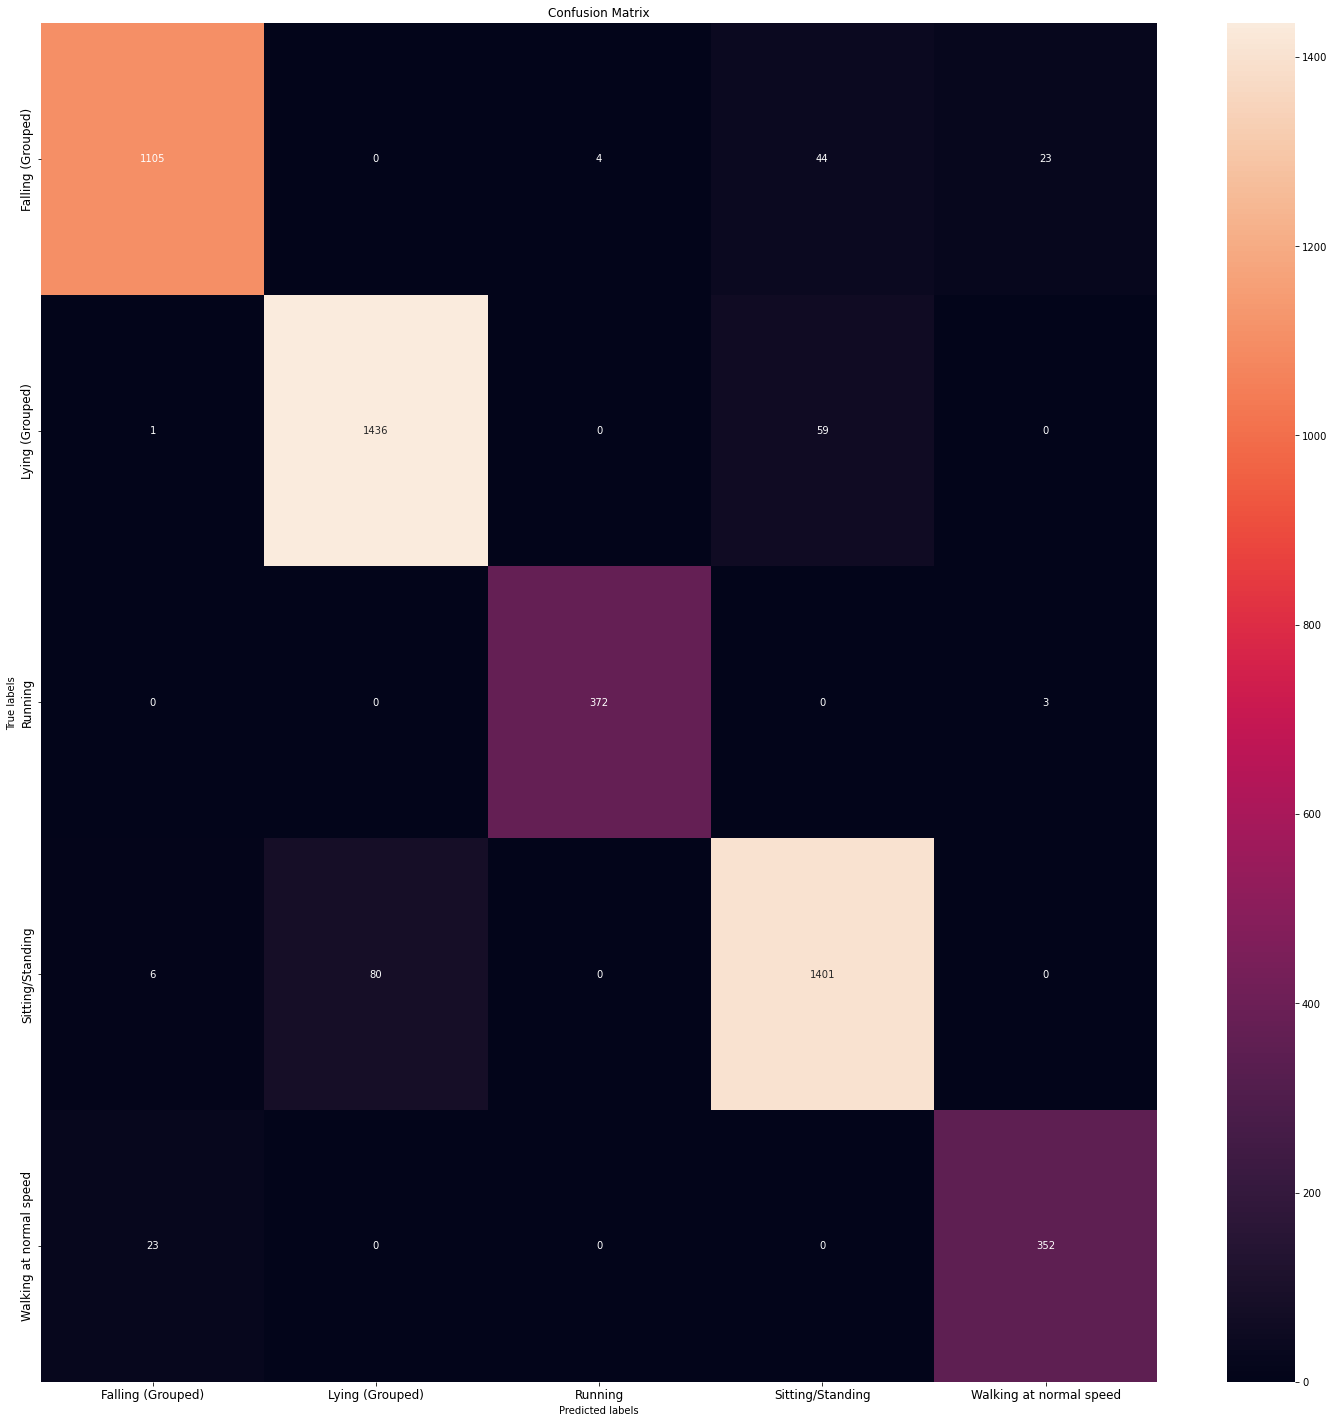

In [60]:
cm = confusion_matrix(y_true_labels,y_pred_labels)
fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);




## Compute Hierarchy


## Compute best model over all test subjects

In [172]:
from sklearn.model_selection import LeaveOneGroupOut
subset_base_df = base_df

X_with_subject_id = subset_base_df[columns_of_interest_initial].reset_index(drop=True)
y_with_subject_id = subset_base_df['activity_code'].reset_index(drop=True)

#Split by subject id
logo = LeaveOneGroupOut()
logo_generator = logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)




In [173]:
train_ix , test_ix = next(logo_generator)
X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

window_size = 14 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 8 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)

# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

Processing rid = Respeck_s1704145_Climbing stairs_23-09-2021_11-34-34
94
Processing rid = Respeck_s1704145_Descending stairs_23-09-2021_11-30-25
94
Processing rid = Respeck_s1704145_Desk work_23-09-2021_11-44-47
94
Processing rid = Respeck_s1704145_Lying down left_23-09-2021_11-40-54
94
Processing rid = Respeck_s1704145_Lying down on back_23-09-2021_11-42-59
94
Processing rid = Respeck_s1704145_Lying down on stomach_05-10-2021_18-36-31
94
Processing rid = Respeck_s1704145_Lying down right_23-09-2021_11-41-34
94
Processing rid = Respeck_s1704145_Movement_23-09-2021_11-45-40
94
Processing rid = Respeck_s1704145_Running_23-09-2021_11-31-45
94
Processing rid = Respeck_s1704145_Sitting bent backward_23-09-2021_11-39-14
94
Processing rid = Respeck_s1704145_Sitting bent forward_23-09-2021_11-38-32
94
Processing rid = Respeck_s1704145_Sitting_23-09-2021_11-37-46
94
Processing rid = Respeck_s1704145_Standing_23-09-2021_11-40-05
94
Processing rid = Respeck_s1704145_Walking at normal speed_23-09-

Processing rid = Respeck_s1732873_Movement_04-10-2021_16-10-37
93
Processing rid = Respeck_s1732873_Running_04-10-2021_15-32-54
93
Processing rid = Respeck_s1732873_Sitting bent backward_04-10-2021_12-55-01
95
Processing rid = Respeck_s1732873_Sitting bent forward_04-10-2021_12-54-13
95
Processing rid = Respeck_s1732873_Sitting_04-10-2021_12-53-07
95
Processing rid = Respeck_s1732873_Standing_04-10-2021_12-55-45
91
Processing rid = Respeck_s1732873_Walking at normal speed_04-10-2021_15-30-06
94
Processing rid = Respeck_s1757177_Climbing stairs_06-10-2021_16-34-18
96
Processing rid = Respeck_s1757177_Descending stairs_02-10-2021_13-57-31
96
Processing rid = Respeck_s1757177_Desk work_02-10-2021_13-47-55
96
Processing rid = Respeck_s1757177_Lying down left_06-10-2021_20-37-42
96
Processing rid = Respeck_s1757177_Lying down on back_02-10-2021_19-55-43
96
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
96
Processing rid = Respeck_s1757177_Lying down right_06-10-

Processing rid = Respeck_s1823274_Lying down left_29-09-2021_12-26-28
96
Processing rid = Respeck_s1823274_Lying down on back_29-09-2021_12-25-45
95
Processing rid = Respeck_s1823274_Lying down on stomach_29-09-2021_12-27-51
96
Processing rid = Respeck_s1823274_Lying down right_29-09-2021_12-27-07
93
Processing rid = Respeck_s1823274_Movement_29-09-2021_12-34-25
95
Processing rid = Respeck_s1823274_Running_29-09-2021_15-11-43
95
Processing rid = Respeck_s1823274_Sitting bent backward_29-09-2021_12-22-22
95
Processing rid = Respeck_s1823274_Sitting bent forward_29-09-2021_12-21-37
95
Processing rid = Respeck_s1823274_Sitting_29-09-2021_12-20-53
95
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
93
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
94
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
95
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
95
Processing rid = Respeck_s1824891_Desk work_06-10-

93
Processing rid = Respeck_s1864705_Lying down on back_29-09-2021_20-51-06
93
Processing rid = Respeck_s1864705_Lying down on stomach_29-09-2021_20-55-09
88
Processing rid = Respeck_s1864705_Lying down right_06-10-2021_23-01-01
93
Processing rid = Respeck_s1864705_Movement_29-09-2021_21-48-22
93
Processing rid = Respeck_s1864705_Running_29-09-2021_21-47-40
93
Processing rid = Respeck_s1864705_Sitting bent backward_29-09-2021_20-46-59
93
Processing rid = Respeck_s1864705_Sitting bent forward_06-10-2021_23-02-03
93
Processing rid = Respeck_s1864705_Sitting_29-09-2021_20-44-14
93
Processing rid = Respeck_s1864705_Standing_29-09-2021_20-48-15
93
Processing rid = Respeck_s1864705_Walking at normal speed_29-09-2021_21-45-37
93
Processing rid = Respeck_s1865890_Climbing stairs_06-10-2021_10-01-56
96
Processing rid = Respeck_s1865890_Descending stairs_06-10-2021_10-03-51
96
Processing rid = Respeck_s1865890_Desk work_05-10-2021_18-26-33
94
Processing rid = Respeck_s1865890_Lying down left_05-

94
Processing rid = Respeck_s1894401_Sitting_01-10-2021_12-07-25
94
Processing rid = Respeck_s1894401_Standing_01-10-2021_12-04-49
93
Processing rid = Respeck_s1894401_Walking at normal speed_01-10-2021_12-18-36
94
Processing rid = Respeck_s1970333_Climbing stairs_13-10-2021_23-34-00
111
Processing rid = Respeck_s1970333_Descending stairs_13-10-2021_23-35-04
134
Processing rid = Respeck_s1970333_Desk work_13-10-2021_21-51-31
118
Processing rid = Respeck_s1970333_Lying down left_13-10-2021_21-32-18
133
Processing rid = Respeck_s1970333_Lying down on back_13-10-2021_21-35-14
155
Processing rid = Respeck_s1970333_Lying down on stomach_13-10-2021_21-39-42
170
Processing rid = Respeck_s1970333_Lying down right_13-10-2021_21-38-20
124
Processing rid = Respeck_s1970333_Movement_13-10-2021_21-54-21
127
Processing rid = Respeck_s1970333_Running_13-10-2021_22-08-22
114
Processing rid = Respeck_s1970333_Sitting bent backward_13-10-2021_21-26-03
108
Processing rid = Respeck_s1970333_Sitting bent f

94
Processing rid = Respeck_s2119637_Sitting_03-10-2021_23-13-48
94
Processing rid = Respeck_s2119637_Standing_03-10-2021_23-16-44
94
Processing rid = Respeck_s2119637_Walking at normal speed_03-10-2021_23-38-30
94
Processing rid = Respeck_s2125423_Desk work_03-10-2021_16-06-40
93
Processing rid = Respeck_s2125423_Lying down left_03-10-2021_15-55-43
94
Processing rid = Respeck_s2125423_Lying down on back_03-10-2021_15-59-06
93
Processing rid = Respeck_s2125423_Lying down on stomach_03-10-2021_16-01-39
93
Processing rid = Respeck_s2125423_Lying down right_03-10-2021_15-57-27
94
Processing rid = Respeck_s2125423_Movement_03-10-2021_16-04-42
93
Processing rid = Respeck_s2125423_Running_03-10-2021_17-35-53
94
Processing rid = Respeck_s2125423_Sitting bent backward_03-10-2021_15-52-10
93
Processing rid = Respeck_s2125423_Sitting bent forward_03-10-2021_15-50-43
94
Processing rid = Respeck_s2125423_Sitting_03-10-2021_15-49-17
94
Processing rid = Respeck_s2125423_Standing_03-10-2021_15-53-38


93
Processing rid = Respeck_s2171931_Walking at normal speed_29-09-2021_14-56-19
93
Processing rid = Respeck_s2173036_Climbing stairs_03-10-2021_23-05-39
95
Processing rid = Respeck_s2173036_Descending stairs_03-10-2021_23-01-56
94
Processing rid = Respeck_s2173036_Desk work_03-10-2021_22-46-58
95
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-32
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-33
3
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-34
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-35
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-36
3
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-37
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-38
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-39
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-40
4
Processing rid = Respeck_s2173036_Falling on

Processing rid = Respeck_s2211162_Lying down right_28-09-2021_10-29-37
94
Processing rid = Respeck_s2211162_Movement_28-09-2021_10-39-45
94
Processing rid = Respeck_s2211162_Running_28-09-2021_11-19-48
94
Processing rid = Respeck_s2211162_Sitting bent backward_28-09-2021_10-25-32
94
Processing rid = Respeck_s2211162_Sitting bent forward_28-09-2021_10-23-12
94
Processing rid = Respeck_s2211162_Sitting_28-09-2021_10-22-16
94
Processing rid = Respeck_s2211162_Standing_28-09-2021_10-26-50
94
Processing rid = Respeck_s2211162_Walking at normal speed_28-09-2021_11-03-08
94
Processing rid = Respeck_s2211228_Climbing stairs_07-10-2021_23-20-09
94
Processing rid = Respeck_s2211228_Descending stairs_07-10-2021_23-20-57
94
Processing rid = Respeck_s2211228_Desk work_06-10-2021_19-40-26
94
Processing rid = Respeck_s2211228_Lying down left_06-10-2021_19-44-52
94
Processing rid = Respeck_s2211228_Lying down on back_29-09-2021_16-35-03
94
Processing rid = Respeck_s2211228_Lying down on stomach_29-09-

In [175]:
print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
metrics = ['accuracy'])



history = model.fit(X_train, y_train,
    batch_size=64, epochs=50, callbacks=[callback],
    validation_data=(X_test, y_test),
    )

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels,y_pred_labels)
fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);



Testing on subject id: ['s1541031'] 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 12, 64)            1216      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            12352     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               32100     
_________________________________________________________________
dense_7 (Dense)  

KeyboardInterrupt: 

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

## Save Model

In [348]:
models_directory = './models/'
current_model_path = models_directory + 'CNN_model_HAR_v4_accuracy_93/'

# tflite_model_filename = 'CNN_HAR_v1.tflite'#default features | Note: split randomly (around 40%)
# tflite_model_filename = 'CNN_HAR_v2.tflite' #default features + added dropout| Note: split by subject id, but sliding windows were grouped by activity_code (not good, mixed results)
tflite_model_filename = 'CNN_HAR_v2_acc_86.tflite' #86 percent- information on this above
tflite_model_filename = 'CNN_HAR_v4_acc_93.tflite' #86 percent- information on this above


In [349]:
#Save original model first. We will use the SavedModel to convert it to TFLite as recommended by the Tensorflow documentation.
tf.saved_model.save(model, current_model_path)

INFO:tensorflow:Assets written to: ./models/CNN_model_HAR_v3_accuracy_86/assets


## Convert SavedModel to TFLite

In [350]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(current_model_path) # path to the SavedModel directory
tflite_model = converter.convert()
# Save the model.
with open(current_model_path+tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

2021-11-15 21:29:10.394630: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-11-15 21:29:10.394660: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-11-15 21:29:10.394665: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:325] Ignored change_concat_input_ranges.
2021-11-15 21:29:10.394790: I tensorflow/cc/saved_model/reader.cc:32] Reading SavedModel from: ./models/CNN_model_HAR_v3_accuracy_86/
2021-11-15 21:29:10.398029: I tensorflow/cc/saved_model/reader.cc:55] Reading meta graph with tags { serve }
2021-11-15 21:29:10.398041: I tensorflow/cc/saved_model/reader.cc:93] Reading SavedModel debug info (if present) from: ./models/CNN_model_HAR_v3_accuracy_86/
2021-11-15 21:29:10.409040: I tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-11-15 21:29:10.524445: I tensorflow/cc/saved_model/loader.cc:190] Running initialization op on Save

## Quick Test on Python - Tensorflow Lite




In [351]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=current_model_path+tflite_model_filename)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print("Input Shape")
print(input_shape)
test = X_test.astype(np.float32)
#Test data to feed as parameter
test_part = test[2:3]
print("See Test Shape")
print(test_part.shape)

interpreter.set_tensor(input_details[0]['index'], test_part)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_results = np.squeeze(output_data)

print("Current output results")
print(output_results)
print(len(output_results))

print("Which is the most confident?")
max_index = np.argmax(output_results, axis=0)

print(max_index)



Input Shape
[ 1 22  6]
See Test Shape
(1, 22, 6)
Current output results
[9.4592655e-01 1.8510664e-03 2.0039419e-04 1.8852131e-06 5.1802486e-02
 5.8688329e-05 1.4491353e-04 1.4034421e-05]
8
Which is the most confident?
0
